# **Problem Statement**

### Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead.
* age: Age of the lead.
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'.
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'.
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%).
* website_visits: How many times has a lead visited the website.
* time_spent_on_website: Total time spent on the website in seconds.
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc.
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc.
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc.

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

# **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

# **Importing the necessary libraries**

In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
learn = pd.read_csv('/Users/AnkurPal/Downloads/ExtraaLearn.csv')##  complete the code to read the data

In [10]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

# **Data Overview**

### View the first and last 5 rows of the dataset

In [12]:
data.head() ##  Complete the code to view top 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [14]:
data.tail() ##  Complete the code to view last 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [32]:
data.shape ##  Complete the code to view dimensions of the data

(4612, 14)

### Check the data types of the columns for the dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Checking the duplicate values

In [20]:
# checking for duplicate values
data.isnull().sum() ##  Complete the code to check duplicate entries in the data

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

### Dropping the unique values column

In [22]:
# checking the number of unique values
data["ID"].nunique()

4612

**Let's drop the ID column first before we proceed forward**.

In [24]:
data = data.drop(['ID'], axis=1) ## Complete the code to drop the ID column from the data

### Checking the statistical summary

In [38]:
data.describe() ##  Complete the code to view the statistical summary of the data

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [40]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

# **Exploratory Data Analysis (EDA)**

**The below functions need to be defined to carry out the EDA.**

In [42]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [44]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [48]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [50]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on age

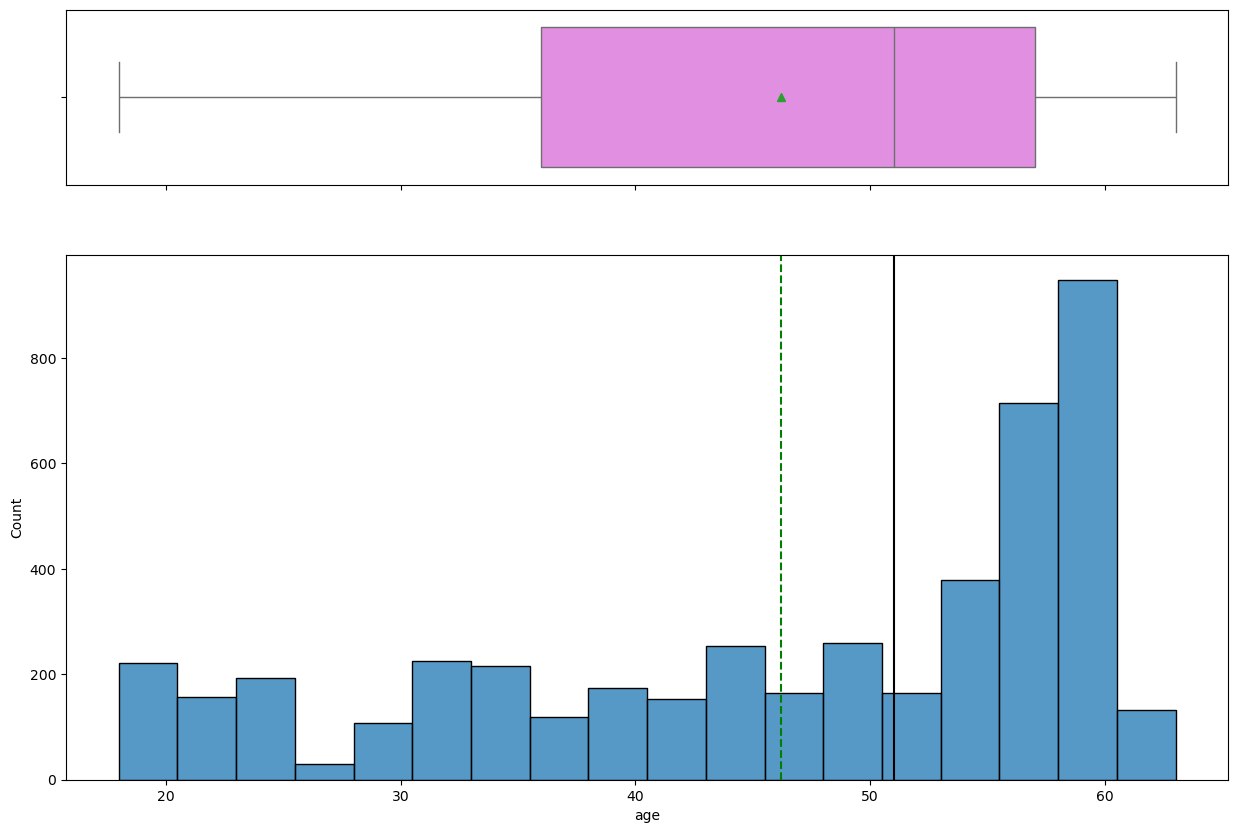

In [52]:
histogram_boxplot(data, "age")

#### Observations on website_visits

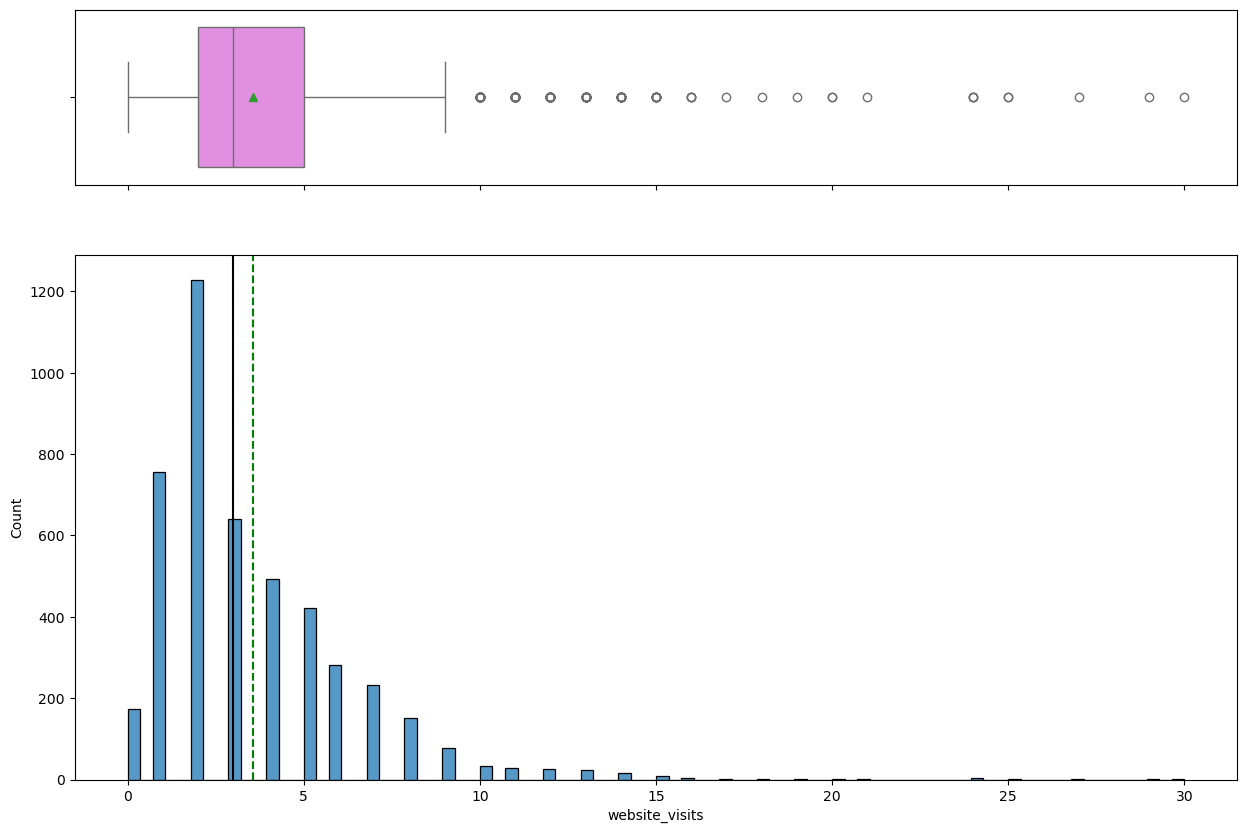

In [54]:
histogram_boxplot(data, "website_visits")  ##Complete the code to get the histogram_boxplot for website_visits

In [56]:
data[data["website_visits"] == 0].shape

(174, 14)

#### Observations on number of time_spent_on_website

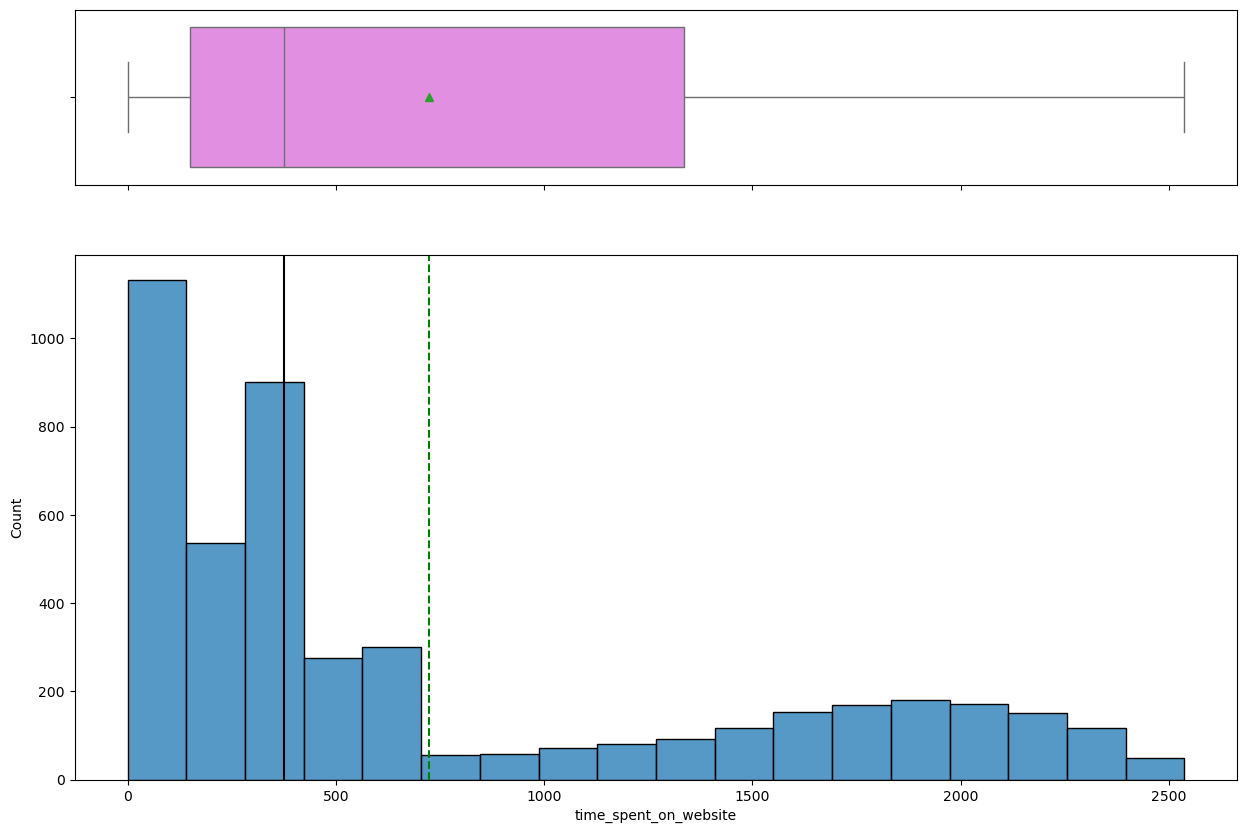

In [60]:
histogram_boxplot(data, "time_spent_on_website")  ##Complete the code to get the histogram_boxplot for time_spent_on_website

#### Observations on number of page_views_per_visit

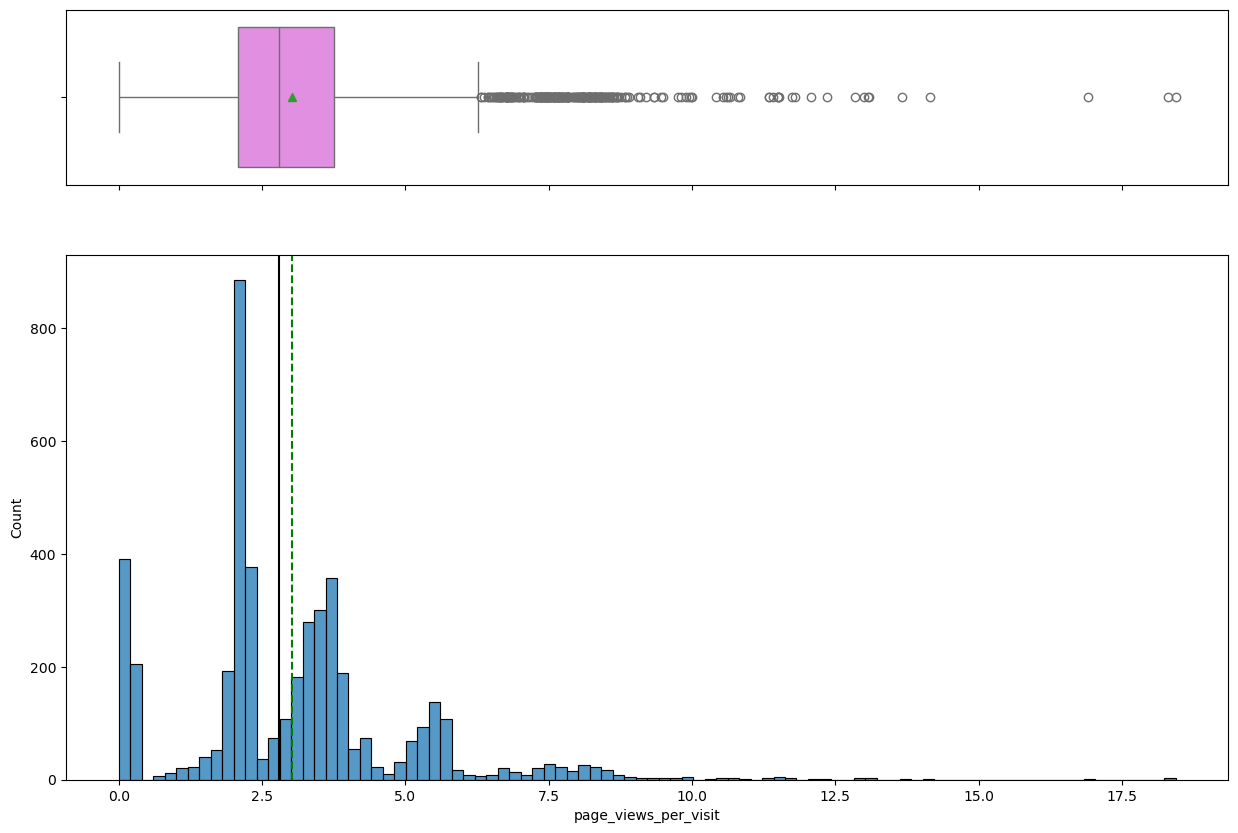

In [62]:
histogram_boxplot(data, "page_views_per_visit")  ##Complete the code to get the histogram_boxplot for page_views_per_visit

#### Observations on number of adults

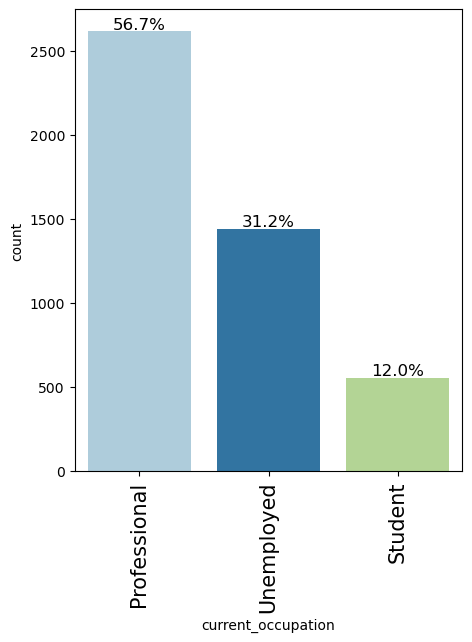

In [64]:
labeled_barplot(data, "current_occupation", perc=True)

#### Observations on number of children

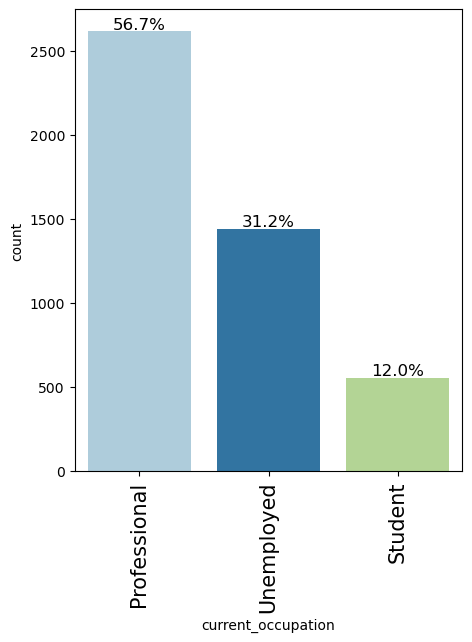

In [89]:
labeled_barplot(data, "current_occupation", perc=True) ## Complete the code to get labeled_barplot for number of children

#### Observations on profile_completed

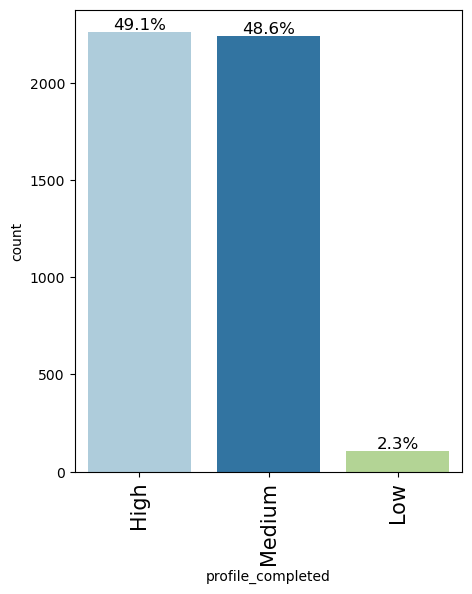

In [73]:
labeled_barplot(data, "profile_completed", perc=True) ## Complete the code to get labeled_barplot for profile_completed

#### Observations on last_activity

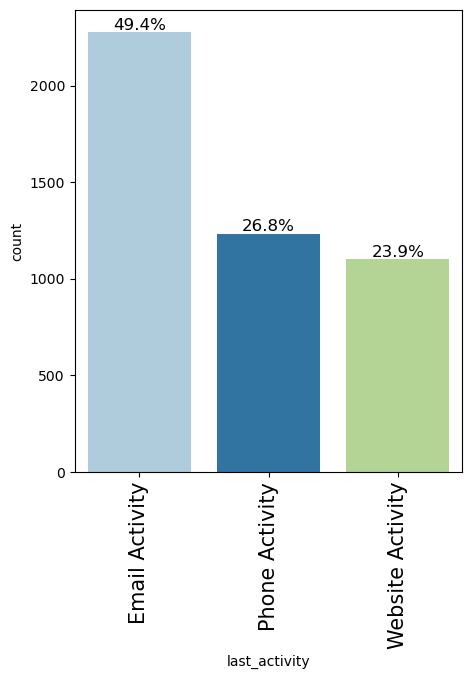

In [75]:
labeled_barplot(data, "last_activity", perc=True) ## Complete the code to get labeled_baplot for last_activity

#### Observations on print_media_type1

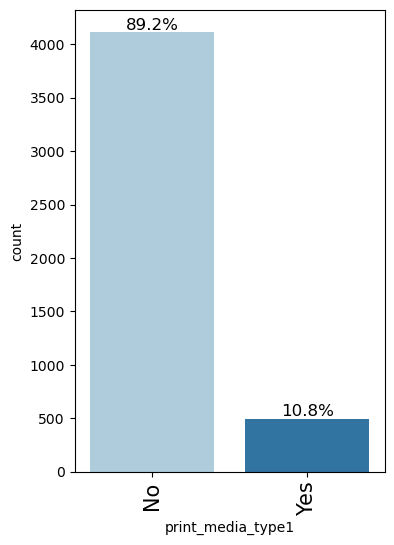

In [77]:
labeled_barplot(data, "print_media_type1", perc=True) ## Complete the code to get labeled_barplot for print_media_type1

#### Observations on print_media_type2

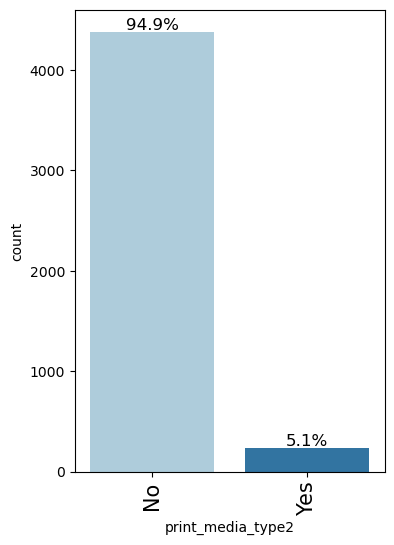

In [79]:
labeled_barplot(data, "print_media_type2", perc=True) ## Complete the code to get labeled_barplot for print_media_type2

#### Observations on room type reserved

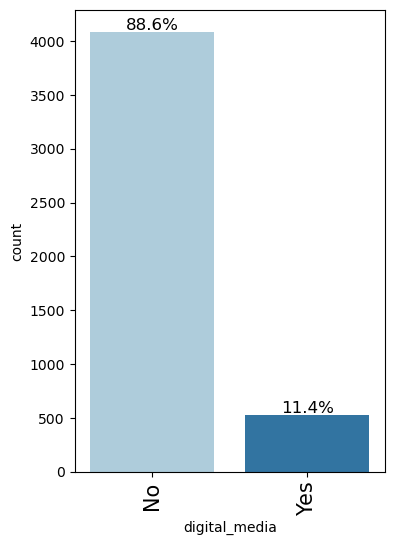

In [81]:
labeled_barplot(data, "digital_media", perc=True) ## Complete the code to get labeled_barplot for digital_media

#### Observations on educational_channels

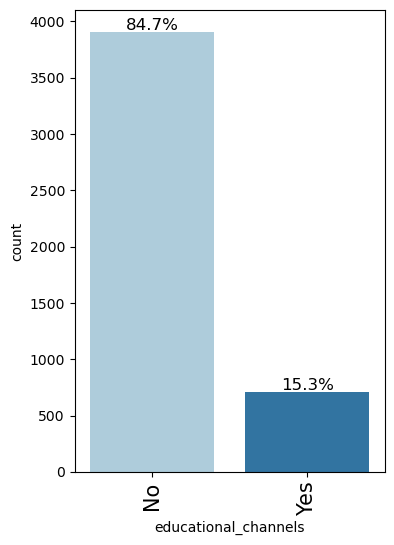

In [83]:
labeled_barplot(data, "educational_channels", perc=True) ## Complete the code to get labeled_barplot for educational_channels

#### Observations on referral

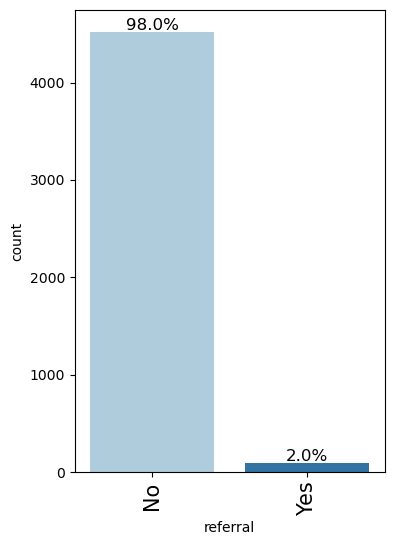

In [85]:
labeled_barplot(data, "referral", perc=True) ## Complete the code to get labeled_barplot for referral

#### Observations on status

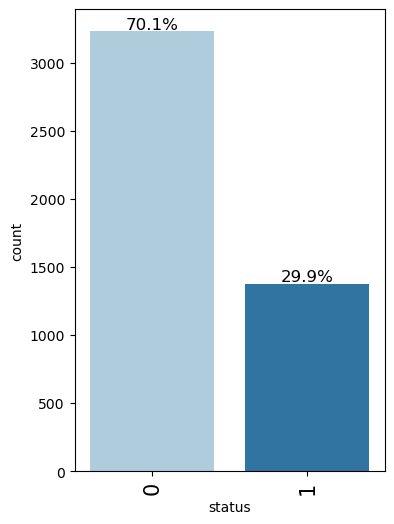

In [87]:
labeled_barplot(data, "status", perc=True) ## Complete the code to get labeled_barplot for status

### Bivariate Analysis

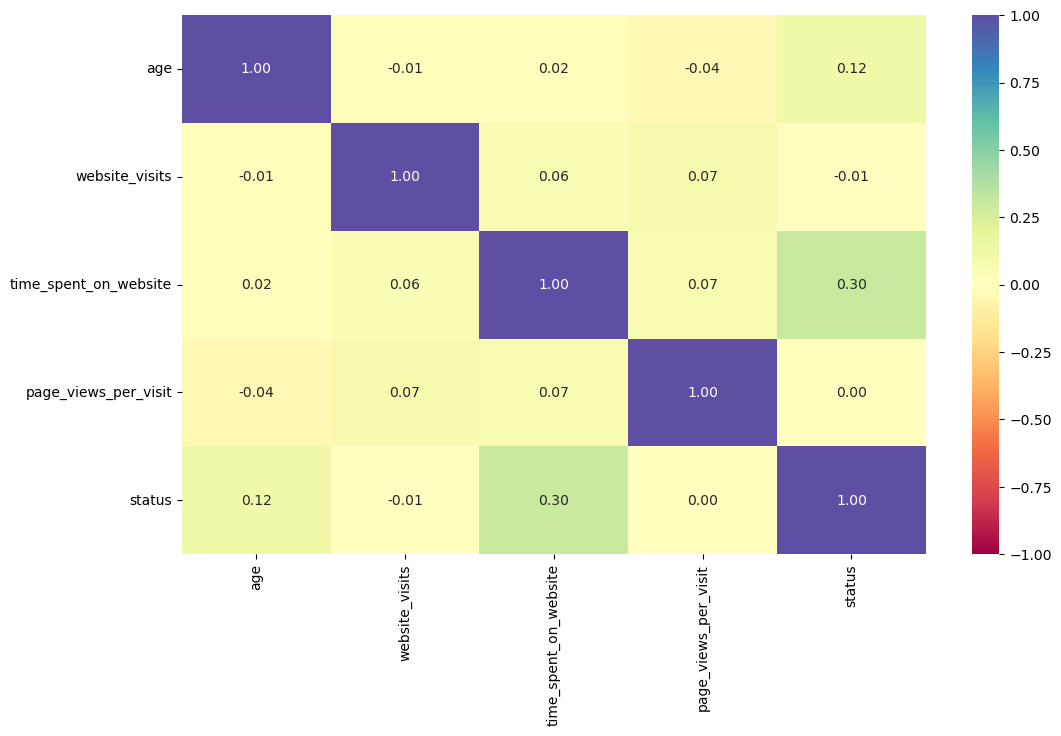

In [91]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


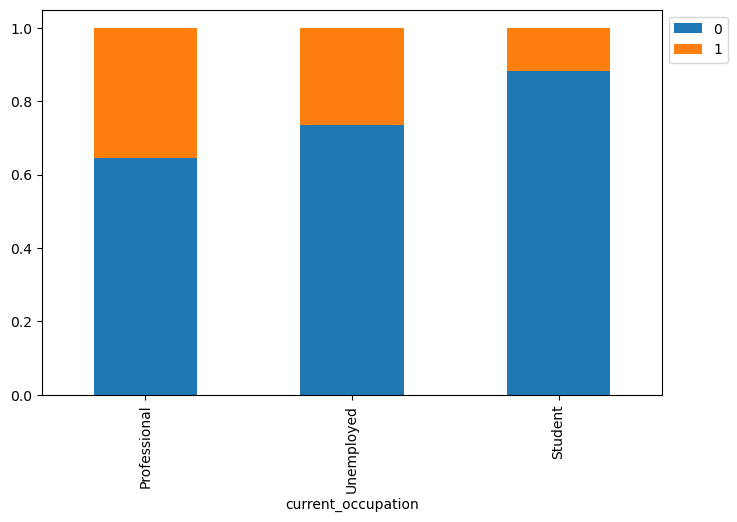

In [93]:
stacked_barplot(data, "current_occupation", "status")

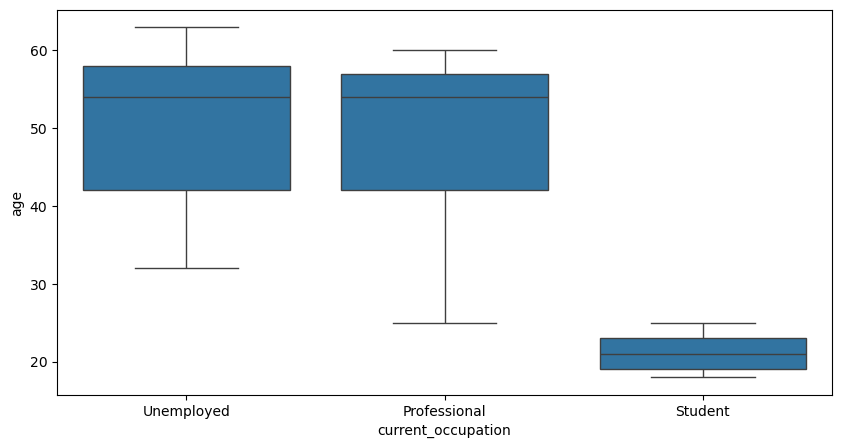

In [95]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="current_occupation", y="age", data=data) ## Complete the code to get a boxplot between current_occupation and age
plt.show()

In [97]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


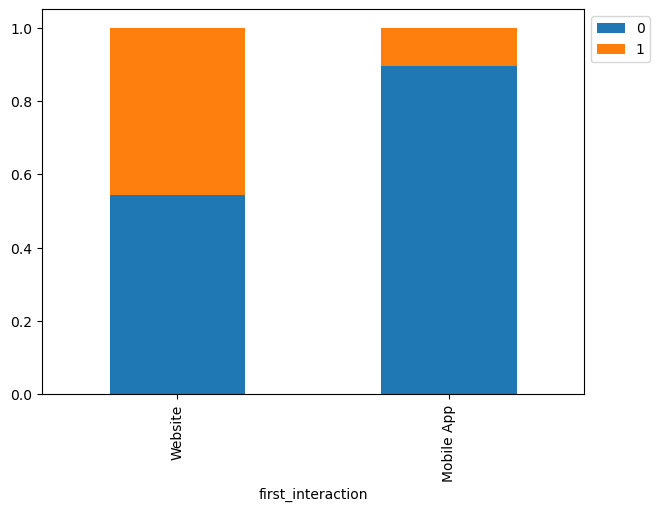

In [99]:
stacked_barplot(data, "first_interaction", "status") ## Complete the code to get stacked_barplot for first_interaction and status

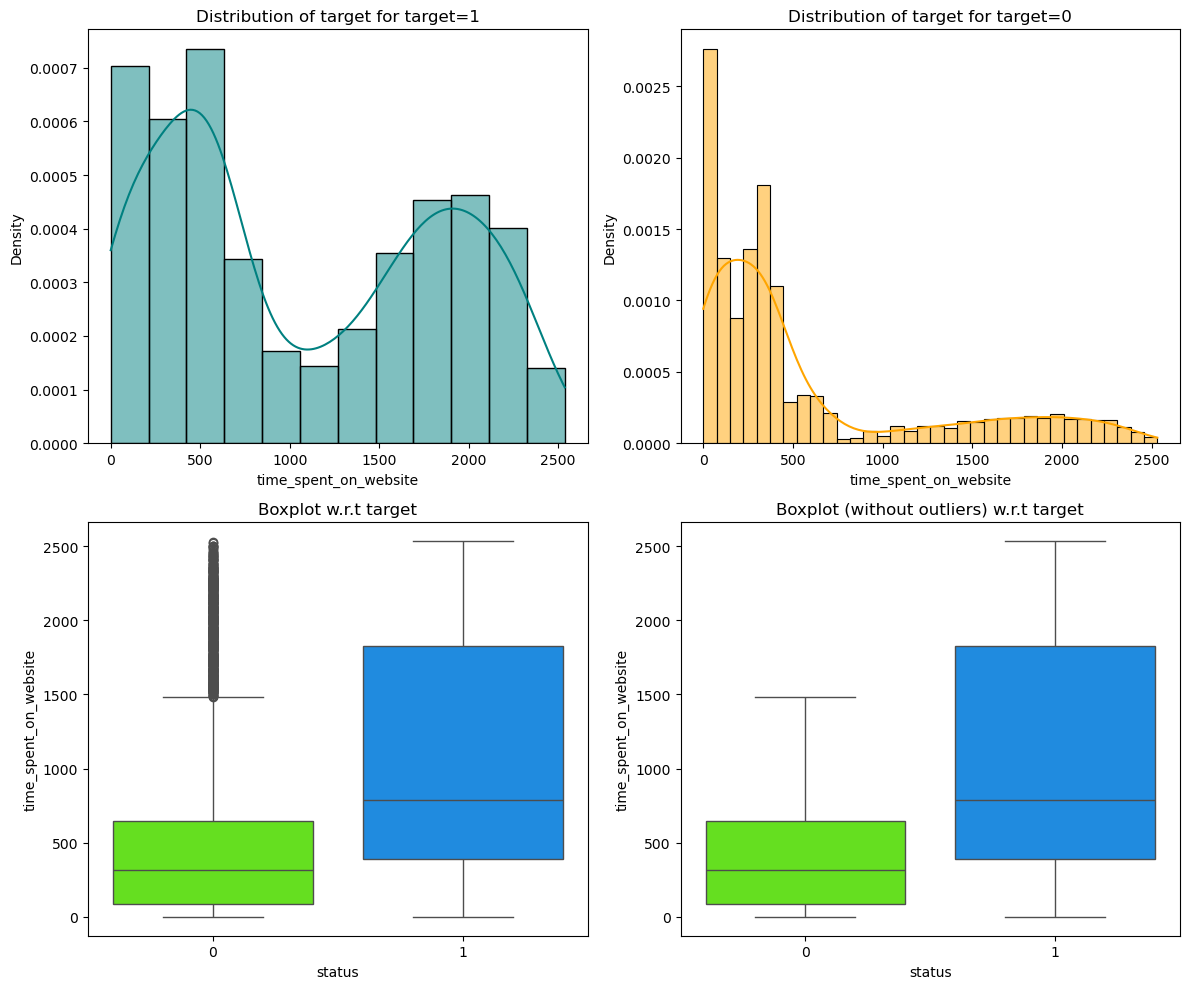

In [101]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [103]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

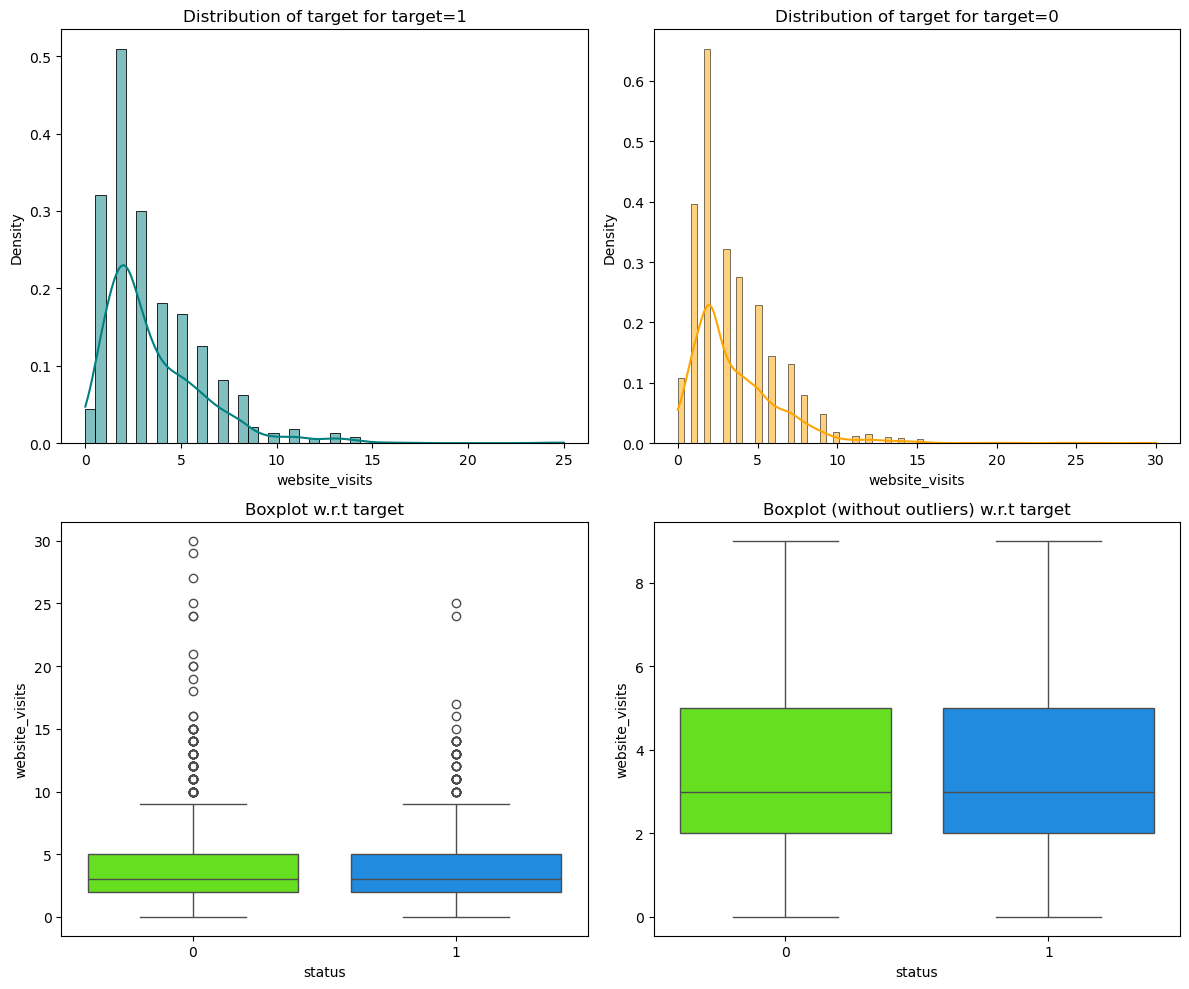

In [105]:
distribution_plot_wrt_target(data, "website_visits", "status") ## Complete the code to get distribution_plot_wrt_target for website_visits and status

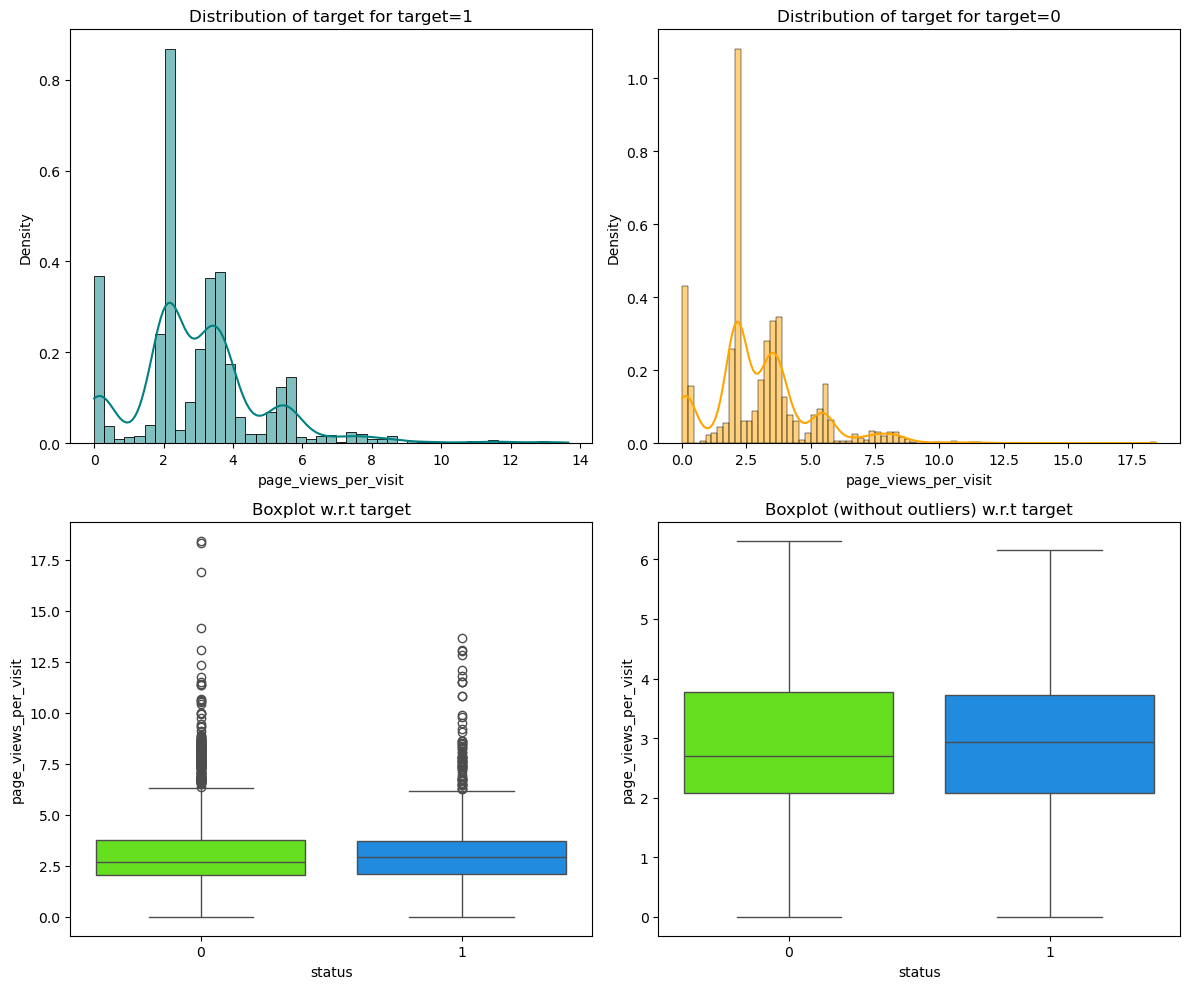

In [107]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status") ## Complete the code to get distribution_plot_wrt_target for page_views_per_visit and status

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


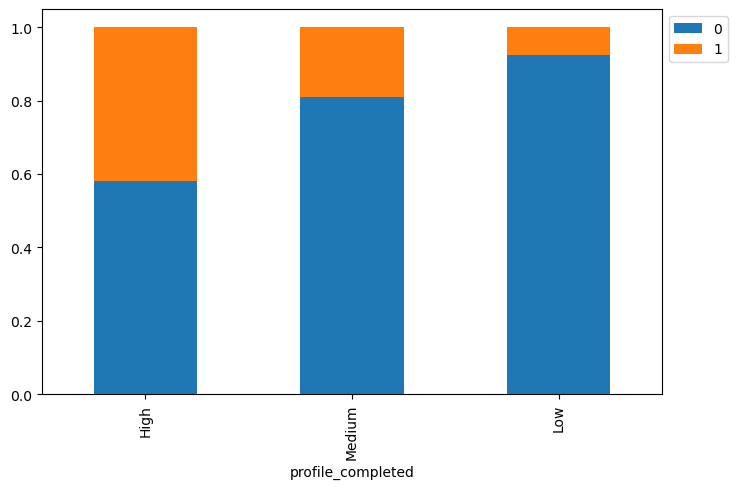

In [112]:
stacked_barplot(data, "profile_completed", "status") ## Complete the code to get stacked_barplot for profile_completed and status

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


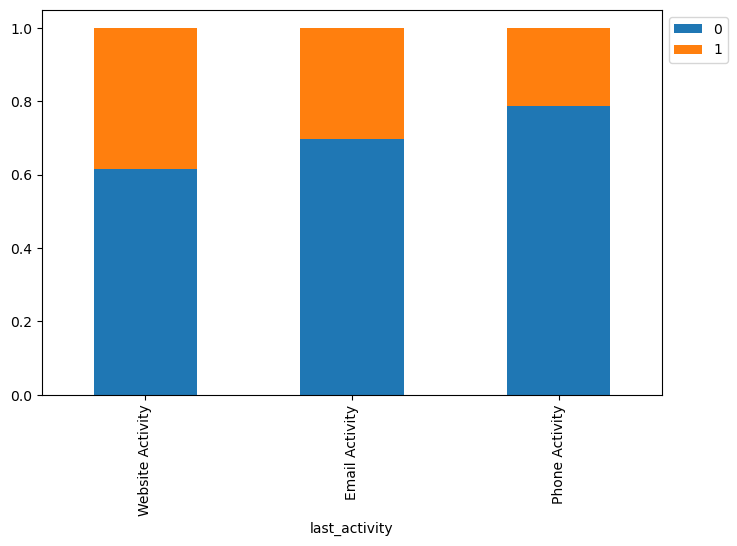

In [114]:
stacked_barplot(data, "last_activity", "status") ## Complete the code to get stacked_barplot for last_activity and status

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


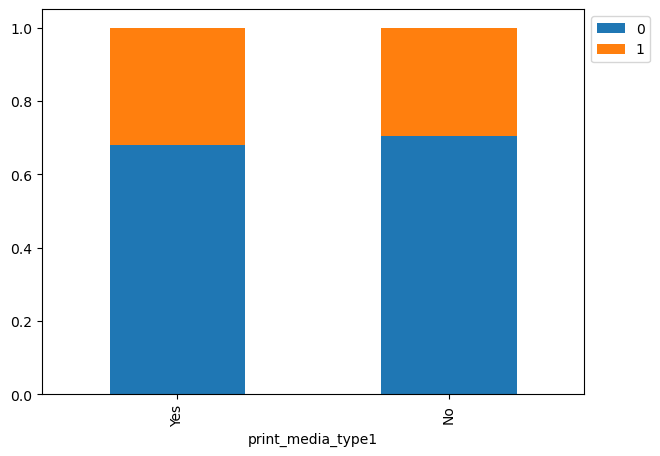

In [118]:
stacked_barplot(data, "print_media_type1", "status") ## Complete the code to get stacked_barplot between print_media_type1 and status

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


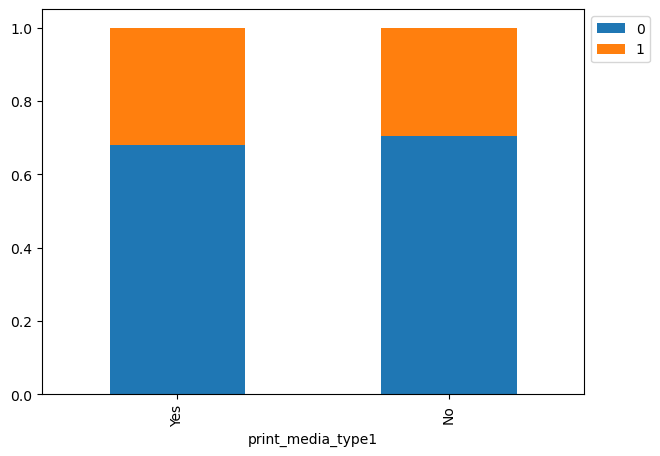

In [120]:
stacked_barplot(data, "print_media_type1", "status") ## Complete the code to get stacked_barplot between print_media_type1 and status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


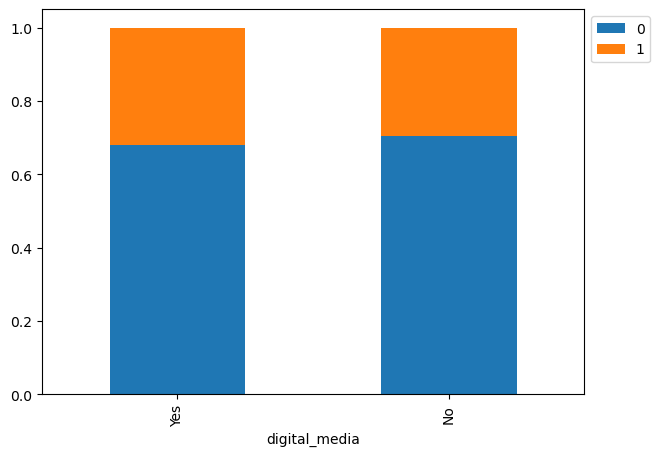

In [122]:
stacked_barplot(data, "digital_media", "status") ## Complete the code to get stacked_barplot between digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


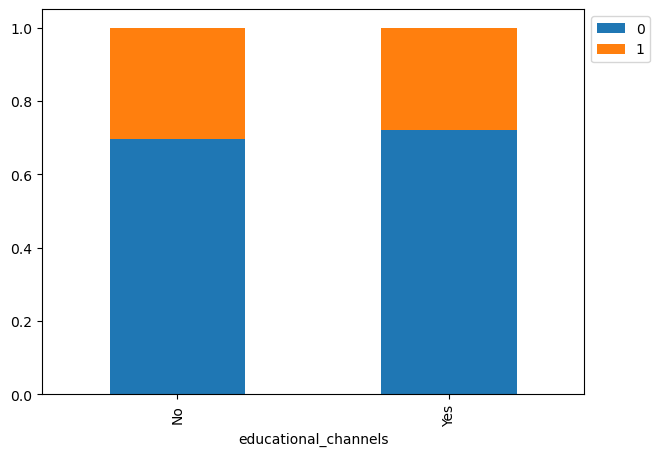

In [124]:
stacked_barplot(data, "educational_channels", "status") ## Complete the code to get stacked_barplot between educational_channels and status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


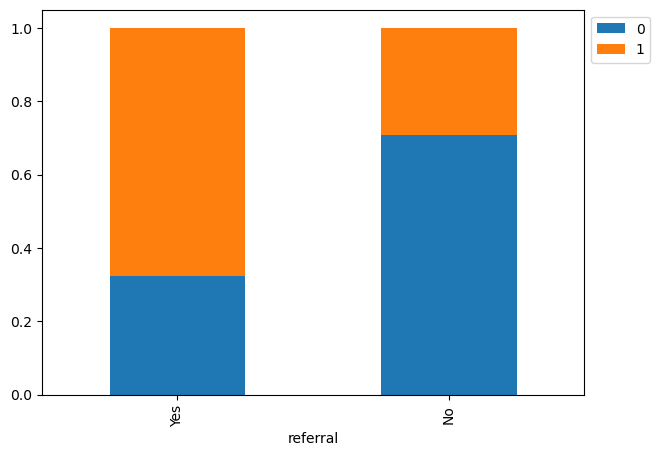

In [126]:
stacked_barplot(data, "referral", "status") ## Complete the code to get stacked_barplot between referral and status

# **Data Preprocessing**

### Outlier Check

- Let's check for outliers in the data.

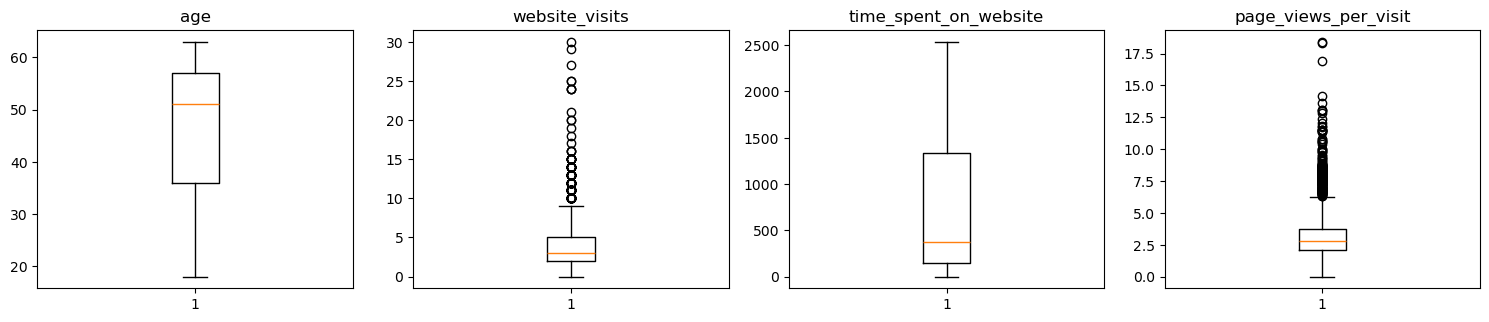

In [128]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [134]:
X = data.drop(["status"], axis=1)
Y = data["status"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42           ## Complete the code to split the data into train and test in the ratio 75:25
)

In [138]:
## Reset the index of y_train so that both x and y have same indexes for training dataset

y_train.reset_index(inplace = True, drop = True)

In [140]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3459, 16)
Shape of test set :  (1153, 16)
Shape of Training set :  (3459,)
Shape of test set :  (1153,)
Percentage of classes in training set:
status
0   0.70107
1   0.29893
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.70252
1   0.29748
Name: proportion, dtype: float64


###Scaling the Data

In [142]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

# **Model Building**

## Model evaluation criterion

**Evaluation Metric of Choice**

*  




First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification function will be used to check the model performance of models.
* The plot_confusion_matrix function will be used to plot the confusion matrix.

In [144]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [146]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with Statsmodel)

In [148]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [150]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

Optimization terminated successfully.
         Current function value: 0.393259
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3459
Model:                          Logit   Df Residuals:                     3442
Method:                           MLE   Df Model:                           16
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.3553
Time:                        19:46:11   Log-Likelihood:                -1360.3
converged:                       True   LL-Null:                       -2109.8
Covariance Type:            nonrobust   LLR p-value:                7.912e-310
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4531      0.059    -24.504     

### Checking Logistic Regression model performance on training set

In [154]:
y_pred = LogisticReg.predict(X_train_with_intercept)

In [156]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.82249,0.65377,0.72532,0.68769


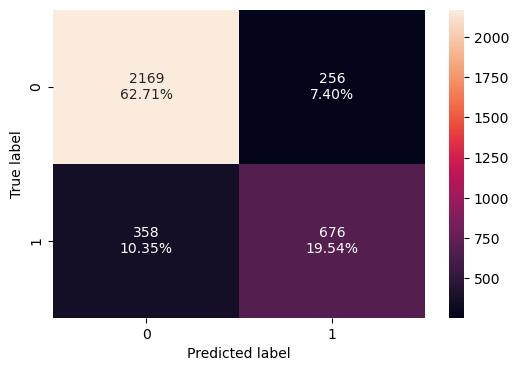

In [158]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

### Checking Logistic Regression model performance on test set

In [160]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.80399,0.61224,0.69307,0.65015


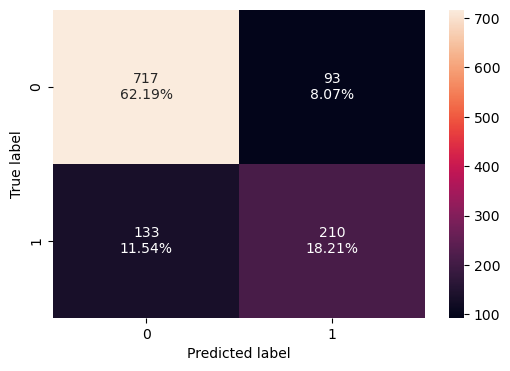

In [162]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

## Decision Tree Classifier

In [164]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


### Checking Decision Tree Classifier performance on training set

In [178]:
## Complete the code to get model performance on training data
decision_tree_perf_train = model_performance_classification(dt_model, X_train, y_train) 
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99971,0.99903,1.00000,0.99952


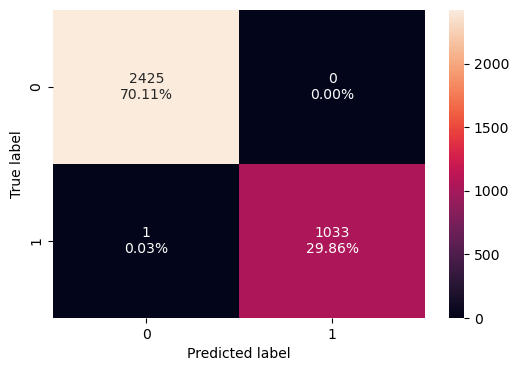

In [172]:
plot_confusion_matrix(dt_model, X_train, y_train)  ## Complete the code to create confusion matrix for training data

### Checking Decision Tree Classifier performance on test set

In [182]:
## Complete the code to get model performance on test data
decision_tree_perf_test = model_performance_classification(dt_model, X_test, y_test)  
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.81526,0.67638,0.69461,0.68538


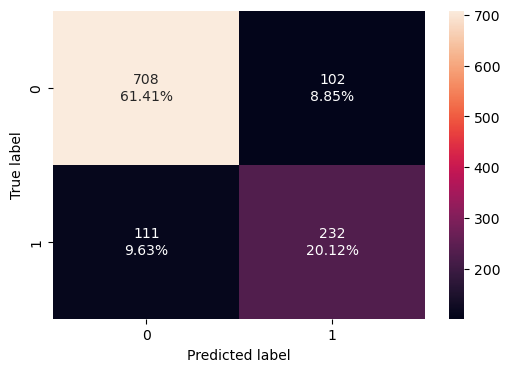

In [184]:
plot_confusion_matrix(dt_model, X_test, y_test)  ## Complete the code to create confusion matrix for test data

# **Model Performance Improvement**

## Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold 	using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

In [186]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [188]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train)  ## Complete the code to calculate VIF for the X_train data with intercept

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                          Variable     VIF
0                              age 6.96678
1                   website_visits 2.52701
2            time_spent_on_website 1.96142
3             page_views_per_visit 3.32519
4       current_occupation_Student 1.34553
5    current_occupation_Unemployed 1.55809
6        first_interaction_Website 2.14406
7            profile_completed_Low 1.05209
8         profile_completed_Medium 1.92465
9     last_activity_Phone Activity 1.51374
10  last_activity_Website Activity 1.46403
11           print_media_type1_Yes 1.12686
12           print_media_type2_Yes 1.05689
13               digital_media_Yes 1.12899
14        educational_channels_Yes 1.18695
15                    referral_Yes 1.03004


**Note:** If you find any variables with high VIF and wish to drop them, please uncomment and run the below code for the same. Feel free to modify the below code according to your own requirements.

In [190]:
# Uncomment and run the below code to remove the variables with high p-values

# # Dropping columns with VIF > 5 iteratively
# while vif_result['VIF'].max() > 5:
#     high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
#     print(f"Dropping {high_vif_column} due to high VIF")
#     X_train_scaled.drop(columns=high_vif_column, inplace=True)
#     X_test_scaled.drop(columns=high_vif_column, inplace=True)
#     vif_result = calculate_vif(X_train_scaled)

### Dealing with high p-value variables

In [192]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.393259
         Iterations 7
Dropping column website_visits with p-value: 0.6479479510695753
Optimization terminated successfully.
         Current function value: 0.393289
         Iterations 7
Dropping column digital_media_Yes with p-value: 0.5827477567779228
Optimization terminated successfully.
         Current function value: 0.393332
         Iterations 7
Dropping column educational_channels_Yes with p-value: 0.5567480874402169
Optimization terminated successfully.
         Current function value: 0.393382
         Iterations 7
Dropping column print_media_type2_Yes with p-value: 0.3388431424365995
Optimization terminated successfully.
         Current function value: 0.393513
         Iterations 7
Dropping column page_views_per_visit with p-value: 0.3258828189347541
Optimization terminated successfully.
         Current function value: 0.393653
         Iterations 7
Dropping column age with p-value: 0.289786

In [253]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]  ## Complete the code to get the test data with selected features
X_train_significant.head(10)

,const,time_spent_on_website,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,referral_Yes
0,1.00000,0.74345,-0.36873,1.46443,-1.09882,-0.15776,-0.96561,1.66496,-0.56322,-0.14267
1,1.00000,-0.97204,2.71202,-0.68286,0.91007,-0.15776,1.03562,-0.60062,-0.56322,-0.14267
2,1.00000,-0.57327,-0.36873,-0.68286,-1.09882,-0.15776,-0.96561,-0.60062,-0.56322,-0.14267
3,1.00000,-0.20930,-0.36873,-0.68286,-1.09882,-0.15776,1.03562,-0.60062,1.77552,-0.14267
4,1.00000,-0.97204,-0.36873,1.46443,0.91007,-0.15776,1.03562,1.66496,-0.56322,-0.14267
5,1.00000,-0.97070,-0.36873,-0.68286,0.91007,-0.15776,-0.96561,-0.60062,-0.56322,-0.14267
6,1.00000,1.59316,-0.36873,-0.68286,-1.09882,-0.15776,-0.96561,1.66496,-0.56322,-0.14267
7,1.00000,0.20686,-0.36873,-0.68286,-1.09882,-0.15776,1.03562,-0.60062,-0.56322,-0.14267
8,1.00000,0.87726,-0.36873,1.46443,0.91007,-0.15776,-0.96561,1.66496,-0.56322,-0.14267
9,1.00000,0.41560,-0.36873,-0.68286,-1.09882,-0.15776,1.03562,-0.60062,-0.56322,-0.14267


### Training the Logistic Regression model again with only the significant features

In [211]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()  ## Complete the code to train the Logistic Regression model with significant features
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.394108
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3459
Model:                          Logit   Df Residuals:                     3449
Method:                           MLE   Df Model:                            9
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.3539
Time:                        20:02:41   Log-Likelihood:                -1363.2
converged:                       True   LL-Null:                       -2109.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4470      0.059    -24.525     

### Determining optimal threshold using ROC Curve

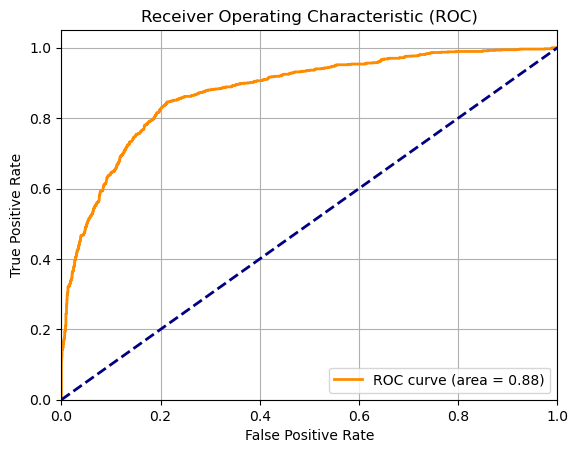

In [215]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)  ## Complete the code to get the ROC-AUC score
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [217]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.282


### Checking tuned Logistic Regression model performance on training set

In [219]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.80457,0.84623,0.62859,0.72135


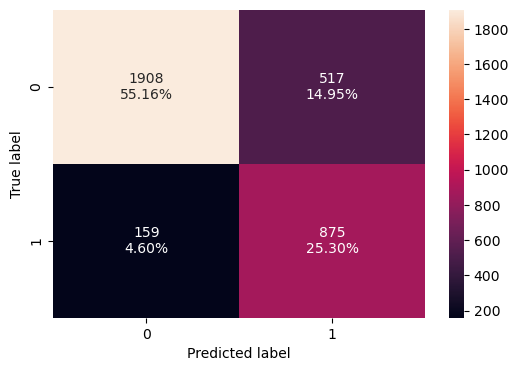

In [221]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

### Checking tuned Logistic Regression model performance on test set

In [223]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.79098,0.83090,0.60897,0.70284


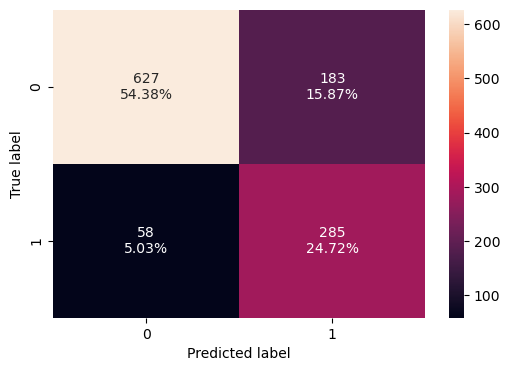

In [225]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

## Decision Tree Classifier (pre-pruning)

### Pre-pruning the tree

**Note**: The parameter values provided are a sample. You can feel free to add/remove values to experiment with different parameter combinations.

In [227]:
# Choose the type of classifier.
dt_model_tuned = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# # Type of scoring used to compare parameter combinations
# acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=40,
                       min_samples_split=20, random_state=42)

### Checking tuned Decision Tree Classifier performance on training set

In [243]:
decision_tree_tuned_perf_train = model_performance_classification(dt_model, X_test, y_test)  ## Complete the code to get model performance on training data
decision_tree_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.81526,0.67638,0.69461,0.68538


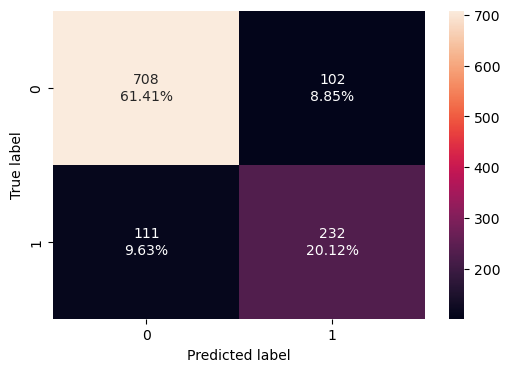

In [245]:
plot_confusion_matrix(dt_model, X_test, y_test)  ## Complete the code to create confusion matrix for training data

### Checking tuned Decision Tree Classifier performance on test set

In [247]:
decision_tree_tuned_perf_test = model_performance_classification(dt_model, X_test, y_test)  ## Complete the code to get model performance on test data
decision_tree_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.81526,0.67638,0.69461,0.68538


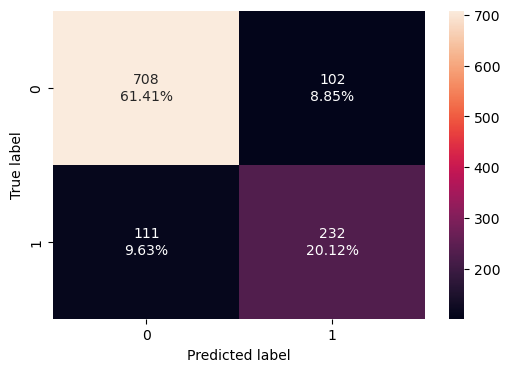

In [255]:
plot_confusion_matrix(dt_model, X_test, y_test)  ## Complete the code to create confusion matrix for test data

### Visualizing the Decision Tree

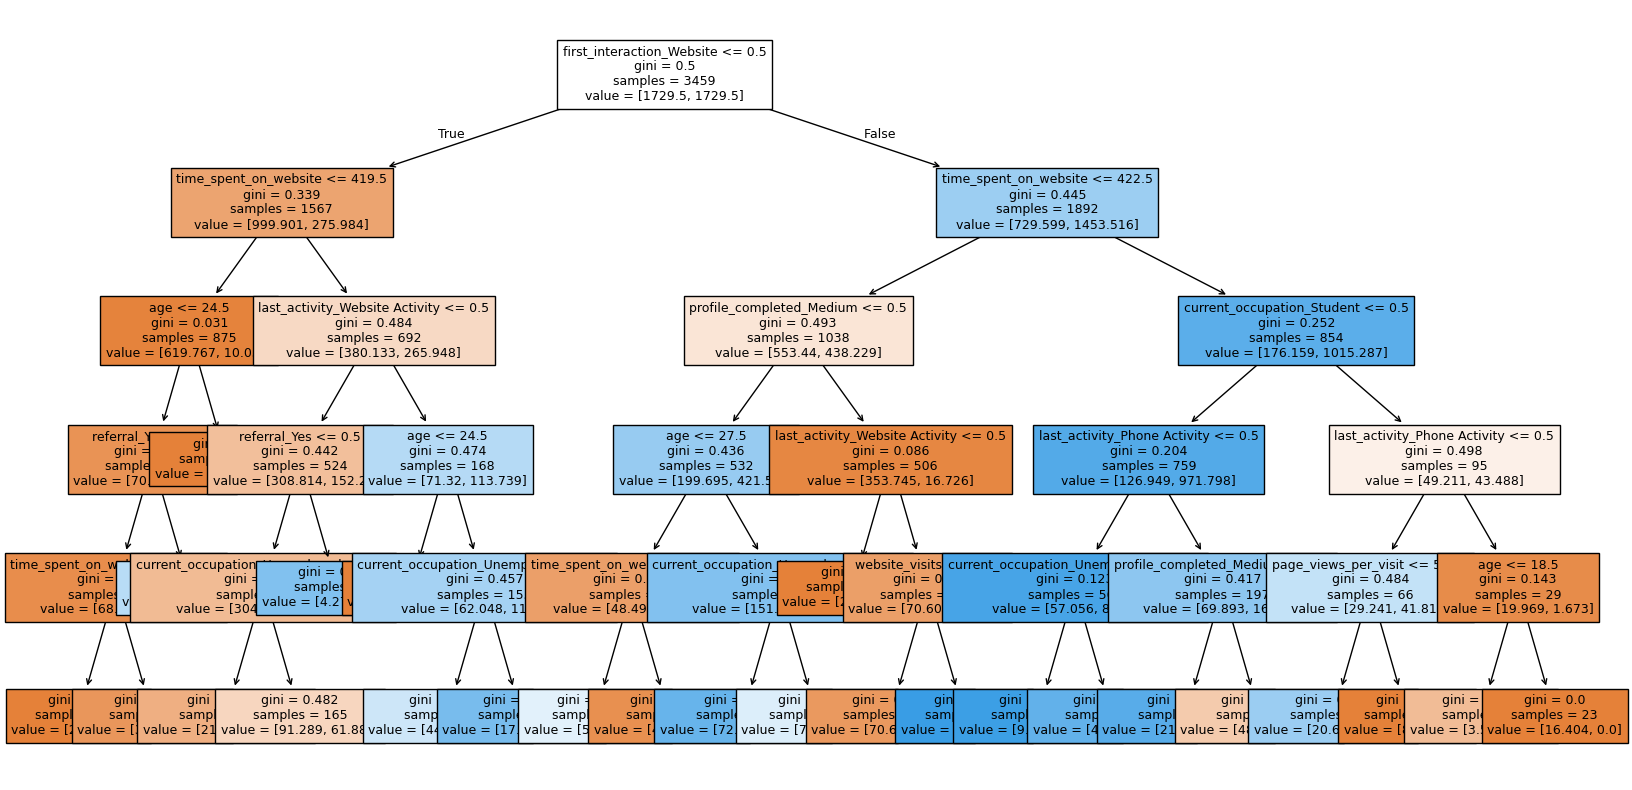

In [257]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Analyzing Feature Importance for tuned Decision Tree Classifier

In [261]:
# Uncomment and run to check feature importance for Tuned Decision Tree model


# # importance of features in the tree building

# feature_names = X_train.columns.tolist()
# importances = dt_model_tuned.feature_importances_
# indices = np.argsort(importances)

# plt.figure(figsize=(8, 8))
# plt.title("Feature Importances")
# plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
# plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# plt.xlabel("Relative Importance")
# plt.show()

# **Model Performance Comparison and Final Model Selection**

In [263]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tuned_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.82249,0.80457,0.99971,0.81526
Recall,0.65377,0.84623,0.99903,0.67638
Precision,0.72532,0.62859,1.00000,0.69461
F1,0.68769,0.72135,0.99952,0.68538


In [265]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        decision_tree_perf_test.T,
        decision_tree_tuned_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.82249,0.80457,0.81526,0.81526
Recall,0.65377,0.84623,0.67638,0.67638
Precision,0.72532,0.62859,0.69461,0.69461
F1,0.68769,0.72135,0.68538,0.68538


# **Actionable Insights and Recommendations**




*



___